# 1. Pytorch Basic Tensor Manipulation

## Vector, Matrix and Tensor
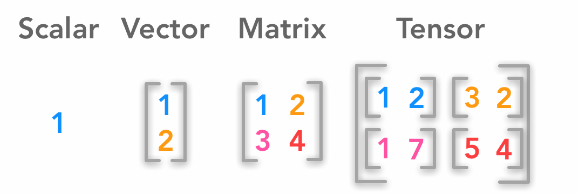

## Pytorch Tensor Shape Convention
### 2D Tensor
* 행렬과 텐서의 크기 표현
* |t| = (Batch size, dim)
* |t|를 (batch size × dimension)으로 표현
* batch size: 행의 크기
* dim : 열의 크기
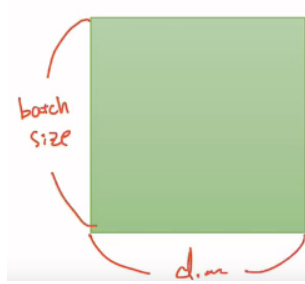


### 3D Tensor(Typical Computer Vision) - 비전 분야에서의 3차원 텐서
* |t| = (batch size, width, height)
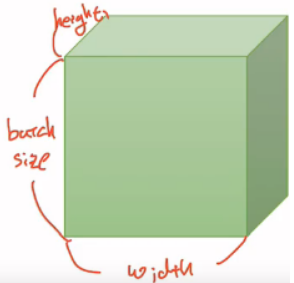
### 3D Tensor(Typical Natural Language Processing) - NLP 분야에서의 3차원 텐서
* |t| = (batch size, length, dim)
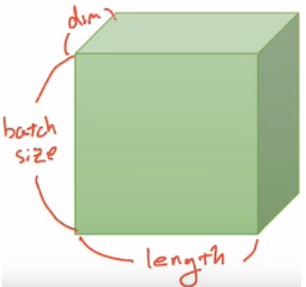

## Pytorch Basic

In [7]:
import numpy as np
import torch

### Numpy Review

In [10]:
# 2D array
t = np.array([[1.,2.,3.],[4.,5.,6.,]])
print(t)

[[1. 2. 3.]
 [4. 5. 6.]]


In [11]:
print('Rank of t : ', t.ndim)
print('Shpe of t : ', t.shape)

Rank of t :  2
Shpe of t :  (2, 3)


### Pytorch Tensor

In [12]:
# 1D array
t = torch.FloatTensor([0.,1.,2.,3.,4.,5.])
print(t)

tensor([0., 1., 2., 3., 4., 5.])


In [15]:
print(t.dim()) # rank, 차원
print(t.shape) # shape
print(t.size()) # size
print(t[0], t[1])
print(t[2:4])

1
torch.Size([6])
torch.Size([6])
tensor(0.) tensor(1.)
tensor([2., 3.])


In [16]:
# 2D array
t = torch.FloatTensor([[1.,2.,3.,],[4.,5.,6.,],[7.,8.,9.],[10.,11.,12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [23]:
print(t.dim()) # rank
print(t.size()) # shape
print(t[:,1]) # 첫번째 차원 전체 선택, 두번째 차원의 1번 인덱스 값만 가져오기
print(t[:,1].size())
print(t[:, :-1]) # 첫번째 차원 전체 선택, 맨 마지막 제외 모두 가져오기

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


### Broadcasting
* 자동으로 크기를 맞춰 연산 수행

In [24]:
# Sample shape
m1 = torch.FloatTensor([[3,3]])
m2 = torch.FloatTensor([[2,2]])
print(m1+m2)

tensor([[5., 5.]])


In [25]:
# Vector + Scalar
m1 = torch.FloatTensor([[1,2]])
m2 = torch.FloatTensor([3]) 
print(m1 + m2) # m1 : broadcasting -> [[3, 3]]

tensor([[4., 5.]])


In [27]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1,2]]) # -> [[1, 2],[1,2]]
m2 = torch.FloatTensor([[3],[4]]) # -> [[3, 3],[4, 4]]
print(m1+m2) 

tensor([[4., 5.],
        [5., 6.]])


### Multiplication vs Matrix Multiplication
*행렬 곱셈, element-wise 곱셈

In [32]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1],[2]])
print(m1.shape)
print(m2.shape)
print('\nMultiplication')
print(m1*m2)
print('\nMatrix Multiplication')
print(m1.matmul(m2)) # m2 -> [[1,1],[2,2]]

torch.Size([2, 2])
torch.Size([2, 1])

Multiplication
tensor([[1., 2.],
        [6., 8.]])

Matrix Multiplication
tensor([[ 5.],
        [11.]])


### Sum and Mean

In [43]:
t = torch.FloatTensor([[1,2],[3,4]])
print(t)
print(t.sum())
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1))

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [53]:
t = torch.FloatTensor([[1,2],[3,4]])
print(t.mean())
print(t.mean(dim=0))

'''
dim = 0 : 첫번째 차원 (행), 인자로 dim을 주면 해당 차원을 제거한다는 의미

t.mean(dim=0)은 입력에서 첫번째 차원을 제거한다.

[[1., 2.],
 [3., 4.]]

1과 3의 평균을 구하고, 2와 4의 평균을 구한다.
결과 ==> [2., 3.]


dim = 1 : 두번째 차원 제거 (열)

'''

print(t.mean(dim=1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])


### Max and Argmax
* 원소의 최대값 리턴
* 최대값을 가진 인덱스 리턴

In [54]:
t = torch.FloatTensor([[1,2],[3,4]])
print(t)
print(t.max()) # Return one value: max
print(t.max(dim=0)) # Return two value : max, argmax
print(t.max(dim=0)[0]) # max # 첫번째 열에서 3의 인덱스 : 1
print(t.max(dim=0)[1]) # argmax # 두번째 열에서 4의 인덱스 : 1
print(t.max(dim=1))

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
tensor([3., 4.])
tensor([1, 1])
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


### view
* 원소의 수를 유지하면서 텐서의 크기 변경
* View 규칙
    * view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 한다
    * 파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추한다

In [58]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [61]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape) # (2, 2, 3) -> (2 × 2, 3) -> (4, 3) : 곱이 모두 12로 동일

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [62]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### squeeze and unsqueeze
* 차원이 1인 차원을 제거
* 특정 위치에 차원이 1인 차원을 추가

<B>view(), squeeze(), unsqueeze()는 텐서의 원소 수를 그대로 유지하면서 모양과 차원을 조절합니다.</B>

In [63]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [64]:
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


In [65]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [66]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape) #  (3,)의 크기를 가졌던 1차원 벡터가 (1, 3)의 2차원 텐서로 변경

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [68]:
# 위 내용을 view로 구현
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [69]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### Type Casting

In [70]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [71]:
print(lt.float())


tensor([1., 2., 3., 4.])


In [72]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [73]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


### Concatenate

In [74]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])
print(torch.cat([x, y], dim=0)) # 첫번째 차원을 늘리기

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [75]:
print(torch.cat([x, y], dim=1)) # 두번째 차원을 늘리기

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### Stacking
* 연산포함

In [76]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [77]:
# 위 작업은 아래 코드와 동일
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [78]:
print(torch.stack([x, y, z], dim=1)) # 두번째 차원이 증가하도록 쌓기

tensor([[1., 2., 3.],
        [4., 5., 6.]])


### ones_like and zeros_like
* 1로 채워진 텐서
* 0으로 채워진 텐서

In [79]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [80]:
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [81]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### In-place Operation
* 덮어쓰기

In [83]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력 -> 기존 값 변하지 않음

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [84]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력 -> 기존 값 변화

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
